## Load dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Titanic-Dataset.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data cleansing

In [9]:
#check duplicates
df.duplicated().any()

False

In [10]:
df[df.duplicated()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
df[df.duplicated()==False].shape[0]

891

## Handling Missing value

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#handle age missing value
# Ekstrak gelar 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Isi Age yang kosong dengan median dari masing-masing gelar
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

# Jika masih ada yang kosong (gelar langka), isi dengan median global
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
#handle cabin missing value
# Ubah menjadi: 1 jika ada nomor kabin, 0 jika NaN
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Setelah itu, kolom 'Cabin' aslinya baru boleh dihapus
df.drop('Cabin', axis=1, inplace=True)

In [16]:
df['Has_Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Has_Cabin, Length: 891, dtype: int64

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1


In [18]:
#handle embarked missing value
mode_embarked = df['Embarked'].mode()[0]
mode_embarked

'S'

In [19]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Has_Cabin      0
dtype: int64

## Check Outlier

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.390202,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.265322,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: xlabel='Age'>

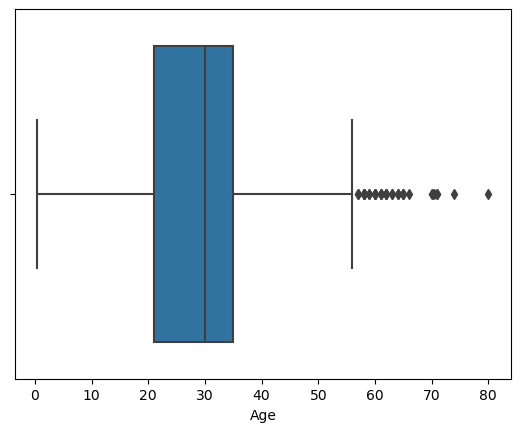

In [22]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Fare'>

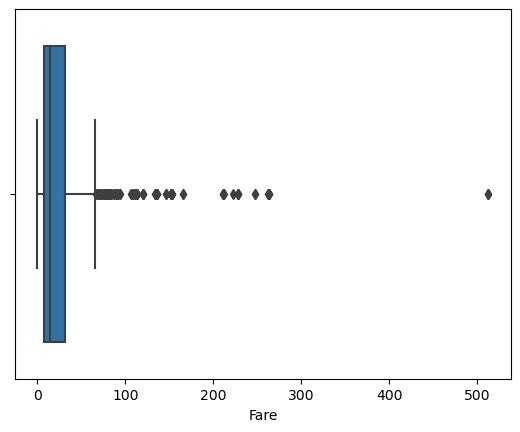

In [23]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

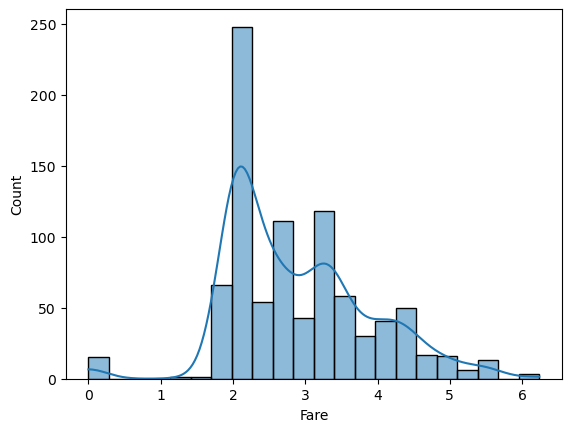

In [24]:
# Menggunakan log1p (log 1+x) untuk menghindari error jika ada nilai 0
df['Fare'] = df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

# Cek distribusi
sns.histplot(df['Fare'], kde=True)

## EDA

In [25]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,Mrs,1


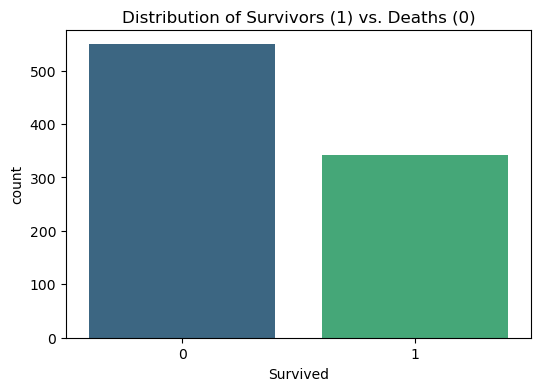

In [28]:
#survived chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribution of Survivors (1) vs. Deaths (0)')
plt.show()

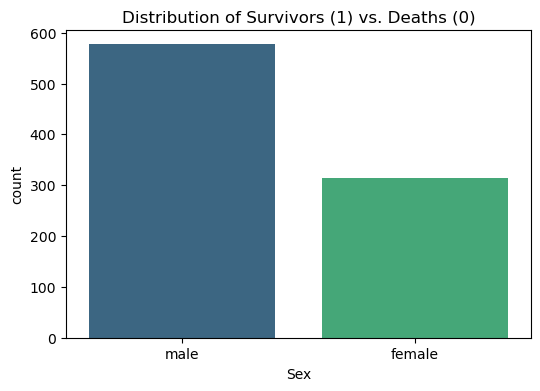

In [29]:
#Sex chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Distribution of Male vs. Female (0)')
plt.show()

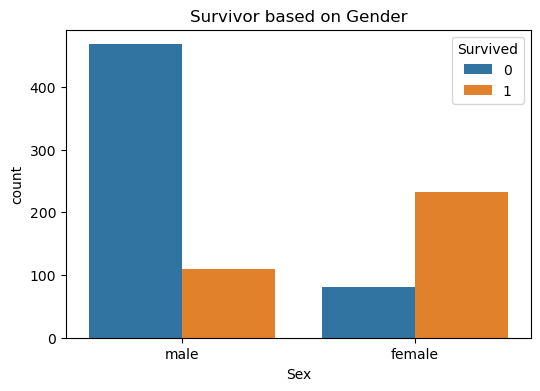

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(df, x="Sex", hue="Survived")
plt.title("Survivor based on Gender")
plt.show()


the survivor most from class 1 and the most death from class 3

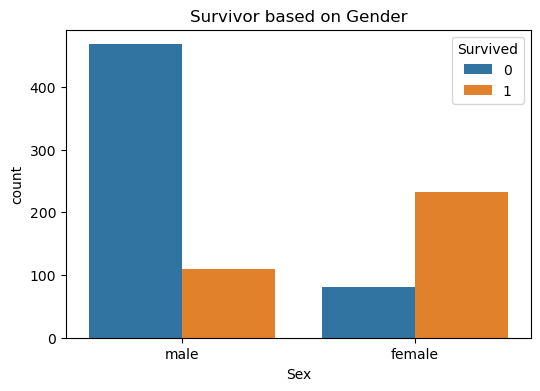

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(df, x="Sex", hue="Survived")
plt.title("Survivor based on Gender")
plt.show()


- C = Cherbourg (France)
- Q = Queenstown (Ireland)
- S = Southampton (England)

- the most passanger whose Death and survived from Southampton (England), 
- and the most passanger from Southampton (England)

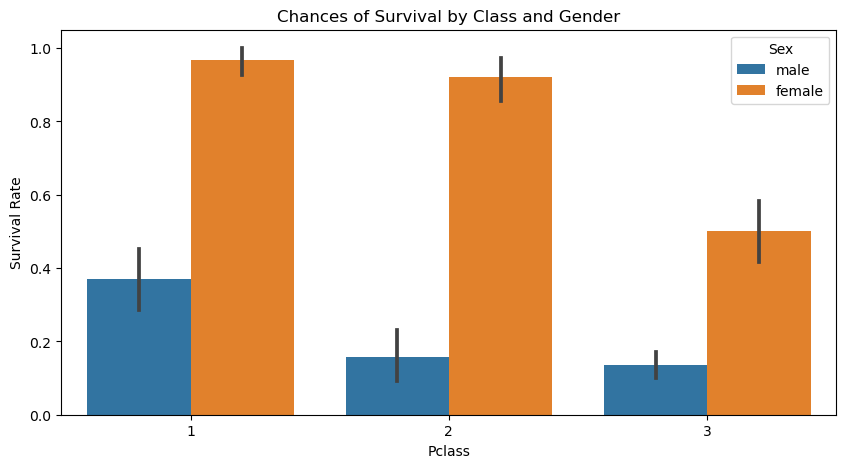

In [45]:
plt.figure(figsize=(10, 5))
# count Chances of Survival by Class and Gender
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Chances of Survival by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

Women in Class 1 have almost a 100% chance of survival, while men in Class 3 have a very low chance.

C:\Users\HP\AppData\Local\Temp\ipykernel_10172\3482997470.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survivor', color='g')
C:\Users\HP\AppData\Local\Temp\ipykernel_10172\3482997470.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Death', color='r')


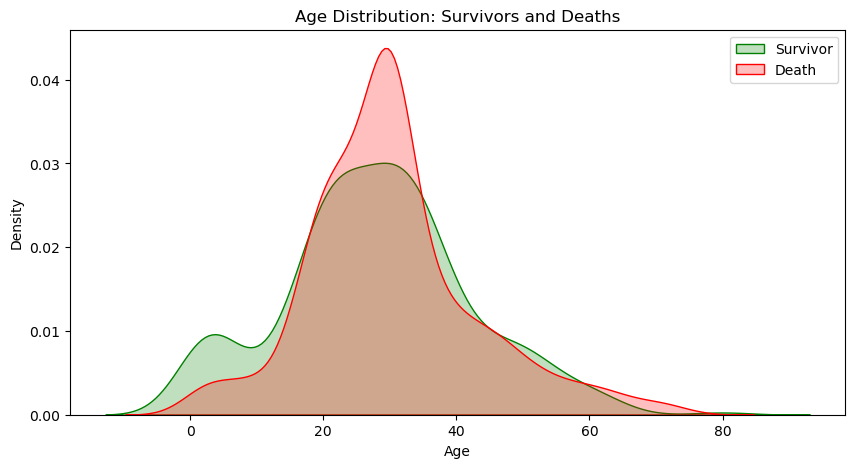

In [51]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survivor', color='g')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Death', color='r')
plt.title('Age Distribution: Survivors and Deaths')
plt.xlabel('Age')
plt.legend()
plt.show()

Notice the "bump" in the children's age area (0-10 years). This demonstrates the "children come first" policy.

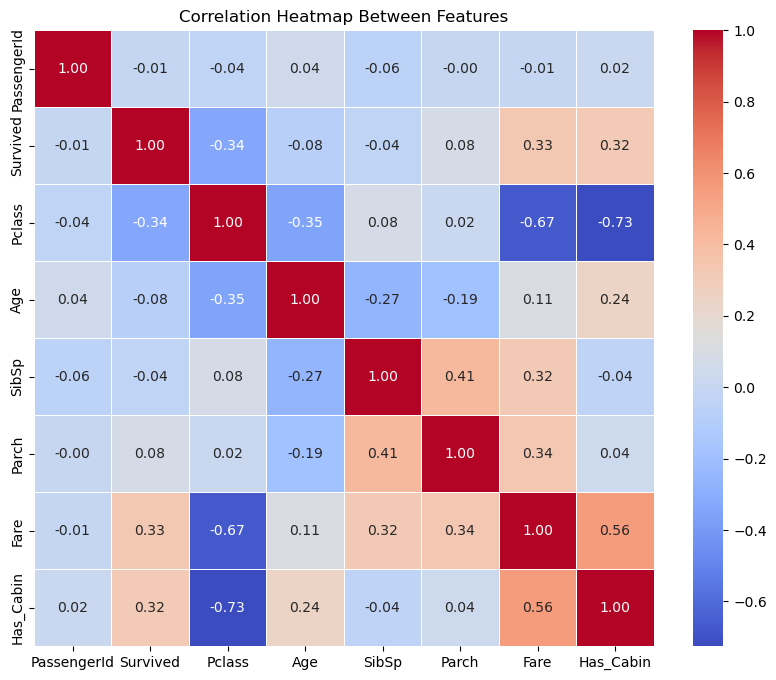

In [49]:
plt.figure(figsize=(10, 8))
# take numeric column for correlation
numeric_cols = df.select_dtypes(include=['number']).columns
correlation = df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

1. Has_Cabin has strong correlation with Fare
2. Survived based on Fare and Has_cabin
3. SibsSp (Sibling Spouse has correlation with ParCh(ParentChildren)

## Feature Engineering

In [54]:
import pandas as pd
import numpy as np

# Asumsi df sudah di-load
# 1. Ekstraksi Gelar (Title) dari Nama
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Kelompokkan gelar yang jarang menjadi 'Rare' atau gelar standar
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [55]:
# 2. Membuat Fitur FamilySize (Ukuran Keluarga)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [56]:
# 3. Membuat Fitur IsAlone (Apakah bepergian sendiri)
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

In [57]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,Mr,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,Mrs,1,2,0


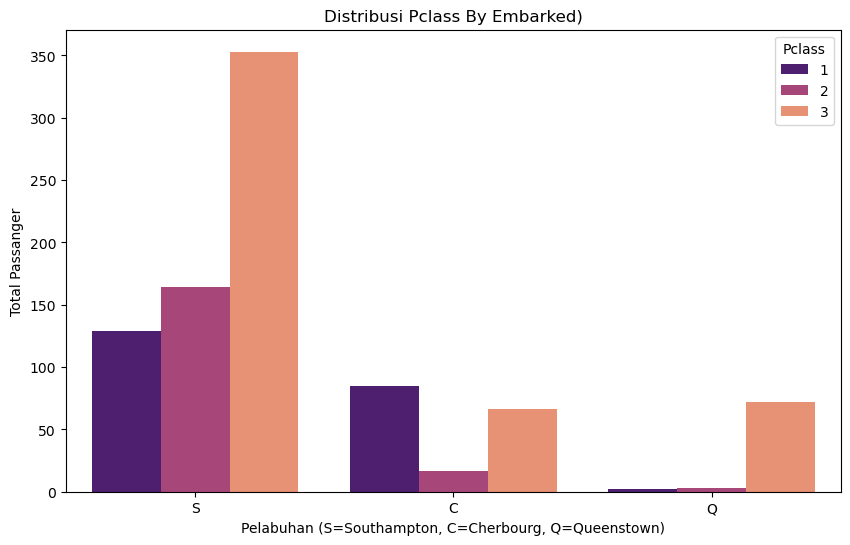

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Pclass', data=df, palette='magma')
plt.title('Distribusi Pclass By Embarked)')
plt.xlabel('Pelabuhan (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Total Passanger')
plt.legend(title='Pclass')
plt.show()

Persentage Pclass by embarked
Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.969040  25.386997  54.643963


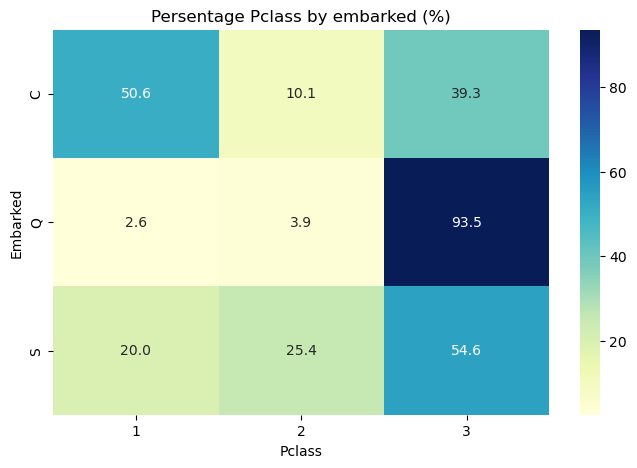

In [60]:
# Membuat tabel korelasi antara Embarked dan Pclass
ct = pd.crosstab(df['Embarked'], df['Pclass'], normalize='index') * 100
print("Persentage Pclass by embarked")
print(ct)

# Visualisasi dalam bentuk Heatmap agar lebih profesional
plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Persentage Pclass by embarked (%)')
plt.show()

- Southampton (S): Typically the largest passenger base across all classes, especially P-class 3. It is a hub for mass departures.

- Cherbourg (C): Often has a higher percentage of P-class 1 passengers than other ports. Many wealthy passengers board here.

- Queenstown (Q): Almost all passengers are P-class 3. This reflects the economic conditions of Irish immigrants seeking a new life in America at the time.

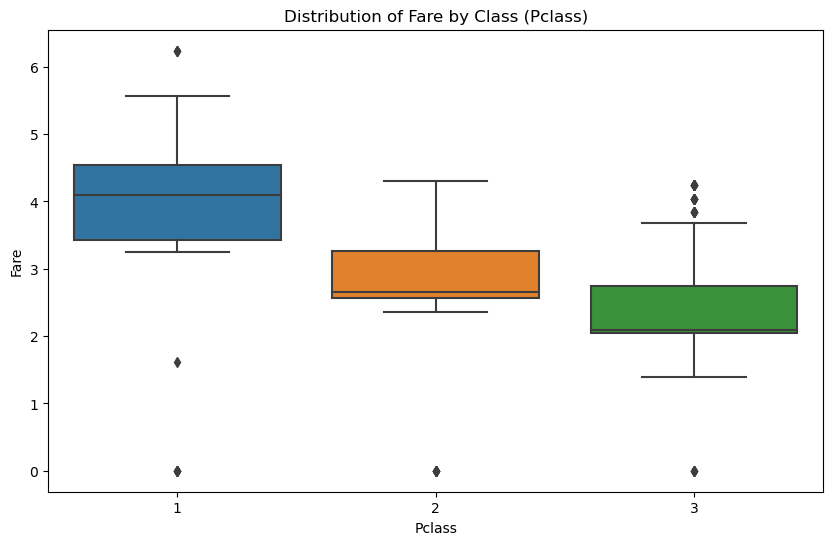

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribution of Fare by Class (Pclass)')
plt.show()

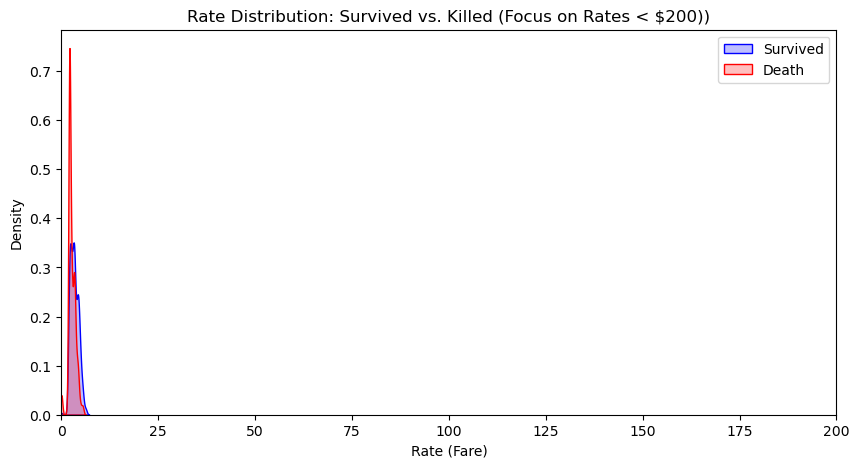

In [64]:
plt.figure(figsize=(10, 5))
# Kita gunakan data yang sudah di-log atau data asli tapi dibatasi range-nya agar terlihat jelas
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label='Survived', fill=True, color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label='Death', fill=True, color='red')

plt.xlim(0, 200) # Membatasi x agar outlier ekstrem tidak merusak skala grafik
plt.title('Rate Distribution: Survived vs. Killed (Focus on Rates < $200))')
plt.xlabel('Rate (Fare)')
plt.legend()
plt.show()

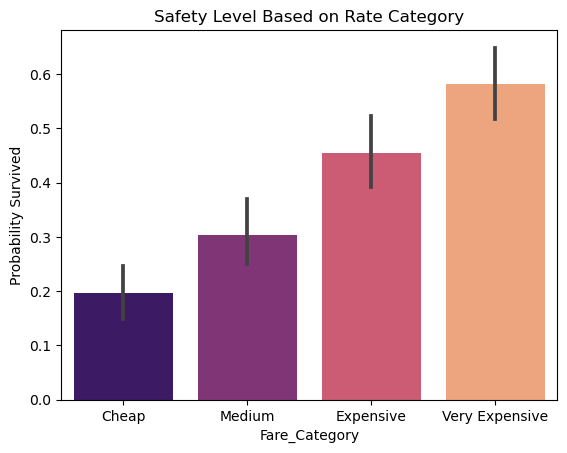

In [70]:
# Membuat 4 kelompok tarif dengan jumlah orang yang sama (Quantile-based binning)
df['Fare_Category'] = pd.qcut(df['Fare'], 4, labels=['Cheap', 'Medium', 'Expensive', 'Very Expensive'])

# Plot tingkat keselamatan per kategori tarif
sns.barplot(x='Fare_Category', y='Survived', data=df, palette='magma')
plt.title('Safety Level Based on Rate Category')
plt.ylabel('Probability Survived')
plt.show()

There is a strong positive correlation between the fare paid and the chance of survival. Passengers in the 'Very Expensive' category have twice the chance of survival compared to those in the 'Cheap' category.

## Data Prepocessing

In [71]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Has_Cabin,FamilySize,IsAlone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,Mr,0,2,0,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,Mrs,1,2,0,Very Expensive


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Embarked       891 non-null    object  
 11  Title          891 non-null    object  
 12  Has_Cabin      891 non-null    int64   
 13  FamilySize     891 non-null    int64   
 14  IsAlone        891 non-null    int64   
 15  Fare_Category  891 non-null    category
dtypes: category(1), float64(2), int64(8), object(5)
memory usage: 105.6+ KB


In [74]:
# menentukan kolom yang akan dibuang
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

# Drop
df_model = df.drop(columns=columns_to_drop)

# 4. Cek sisa kolom
print("Kolom yang siap masuk model:")
print(df_model.columns)

Kolom yang siap masuk model:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'Has_Cabin', 'FamilySize', 'IsAlone', 'Fare_Category'],
      dtype='object')


In [75]:
df_model.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Has_Cabin,FamilySize,IsAlone,Fare_Category
0,0,3,male,22.0,1.981001,S,Mr,0,2,0,Cheap
1,1,1,female,38.0,4.266662,C,Mrs,1,2,0,Very Expensive


In [76]:
#Encoding
# use pd.get_dummies dengan drop_first=True
df_final = pd.get_dummies(df_model, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# lihat hasil
print(f"Total column before encoding: {df_model.shape[1]}")
print(f"Total column after encoding: {df_final.shape[1]}")
df_final.head()

Total column before encoding: 11
Total column after encoding: 15


,Survived,Pclass,Age,Fare,Has_Cabin,FamilySize,IsAlone,Fare_Category,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1.981001,0,2,0,Cheap,True,False,True,False,True,False,False
1,1,1,38.0,4.266662,1,2,0,Very Expensive,False,False,False,False,False,True,False
2,1,3,26.0,2.070022,0,1,1,Medium,False,False,True,True,False,False,False
3,1,1,35.0,3.972177,1,2,0,Very Expensive,False,False,True,False,False,True,False
4,0,3,35.0,2.085672,0,1,1,Medium,True,False,True,False,True,False,False


In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Age            891 non-null    float64 
 3   Fare           891 non-null    float64 
 4   Has_Cabin      891 non-null    int64   
 5   FamilySize     891 non-null    int64   
 6   IsAlone        891 non-null    int64   
 7   Fare_Category  891 non-null    category
 8   Sex_male       891 non-null    bool    
 9   Embarked_Q     891 non-null    bool    
 10  Embarked_S     891 non-null    bool    
 11  Title_Miss     891 non-null    bool    
 12  Title_Mr       891 non-null    bool    
 13  Title_Mrs      891 non-null    bool    
 14  Title_Rare     891 non-null    bool    
dtypes: bool(7), category(1), float64(2), int64(5)
memory usage: 56.0 KB


In [78]:
# 1. Drop Fare_Category karena sudah ada Fare hasil Log
df_final = df_final.drop(columns=['Fare_Category'])
df_final.head()

,Survived,Pclass,Age,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1.981001,0,2,0,True,False,True,False,True,False,False
1,1,1,38.0,4.266662,1,2,0,False,False,False,False,False,True,False
2,1,3,26.0,2.070022,0,1,1,False,False,True,True,False,False,False
3,1,1,35.0,3.972177,1,2,0,False,False,True,False,False,True,False
4,0,3,35.0,2.085672,0,1,1,True,False,True,False,True,False,False


In [79]:
print(df_final.info()) 
print(df_final.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Has_Cabin   891 non-null    int64  
 5   FamilySize  891 non-null    int64  
 6   IsAlone     891 non-null    int64  
 7   Sex_male    891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
 10  Title_Miss  891 non-null    bool   
 11  Title_Mr    891 non-null    bool   
 12  Title_Mrs   891 non-null    bool   
 13  Title_Rare  891 non-null    bool   
dtypes: bool(7), float64(2), int64(5)
memory usage: 54.9 KB
None
Survived      0
Pclass        0
Age           0
Fare          0
Has_Cabin     0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    

In [80]:
# memisahkan fitur (X) dan target (y)
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

# 3. Train-Test Split (80% Train, 20% Test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Training: {X_train.shape[0]} rows")
print(f"Data Testing: {X_test.shape[0]} rows")

Data Training: 712 rows
Data Testing: 179 rows


## Scaling

In [81]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit hanya pada data TRAIN untuk menghindari data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Transform data TEST menggunakan parameter dari data train
X_test_scaled = scaler.transform(X_test)

## Random Forest Modeling

In [82]:
#RandomForest Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)

# Hasil
print(f"Akurasi Baru: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Baru: 0.8324

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [92]:
#nilai roc_auc_score 
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.8272200772200773


## Hyperparameter Tuning Random Forest

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# 2. Tentukan parameter yang ingin diuji (Grid)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 3. Setup GridSearchCV
# cv=5 artinya data train dibagi 5 untuk validasi silang
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# 4. Jalankan pencarian (Training ulang berkali-kali secara otomatis)
grid_search.fit(X_train_scaled, y_train)

# 5. Ambil parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)
print(f"Skor Akurasi Terbaik saat CV: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Parameter Terbaik: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Skor Akurasi Terbaik saat CV: 0.8370


Akurasi Akhir pada Test Set: 0.8268

Confusion Matrix:


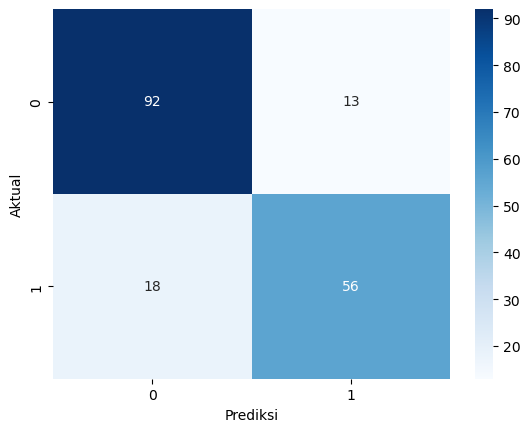


Classification Report Final:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [87]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Gunakan model terbaik hasil tuning
best_rf_model = grid_search.best_estimator_
y_pred_final = best_rf_model.predict(X_test_scaled)

# Tampilkan Hasil Akhir
print(f"Akurasi Akhir pada Test Set: {accuracy_score(y_test, y_pred_final):.4f}")
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("\nClassification Report Final:\n", classification_report(y_test, y_pred_final))

In [94]:
#roc_auc_score final
print(roc_auc_score(y_test, y_pred_final))

0.8164736164736165


## Top 10 Features

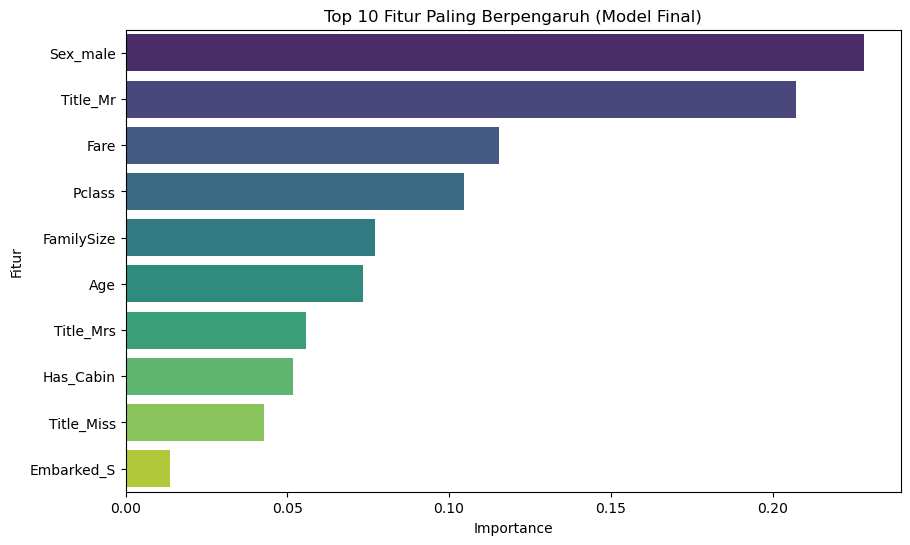

In [88]:
import pandas as pd

# Ambil tingkat kepentingan fitur
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Fitur Paling Berpengaruh (Model Final)')
plt.show()

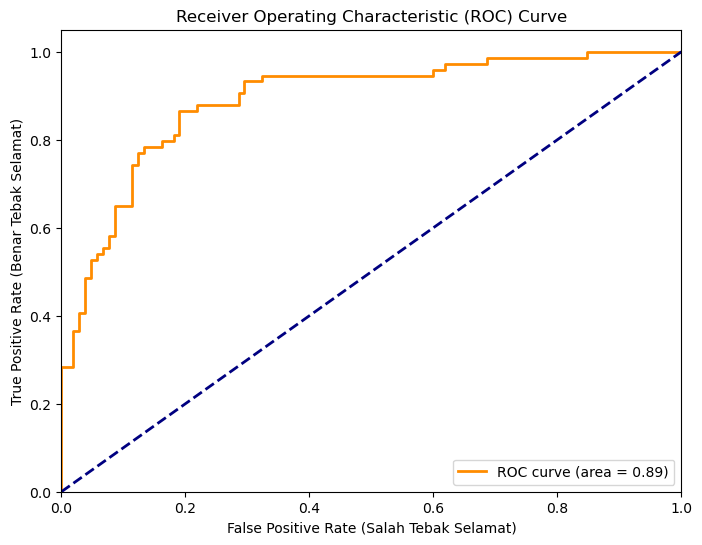

In [95]:
from sklearn.metrics import roc_curve, auc

# Menghitung peluang (probability) bukan sekadar 0 atau 1
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Garis bantu tebak acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Salah Tebak Selamat)')
plt.ylabel('True Positive Rate (Benar Tebak Selamat)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision tree modeling

In [102]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Training model
dt_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = dt_model.predict(X_test_scaled)

# Hasil
print(f"Akurasi Baru: {accuracy_score(y_test, y_pred):.4f}")
print(f"Roc_auc_score: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Baru: 0.7821
Roc_auc_score: 0.7804

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



## Hyperparamater tuning Decision Tree

In [103]:
## optimal Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)

# 2. Tentukan Parameter (Hyperparameter Space)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Setup GridSearchCV
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

# 4. Ambil Model Terbaik
best_dt_model = dt_grid_search.best_estimator_

print(f"Parameter Decision Tree Terbaik: {dt_grid_search.best_params_}")

Parameter Decision Tree Terbaik: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Akurasi Akhir pada Test Set: 0.8268
Roc_auc_score: 0.8165

Confusion Matrix:


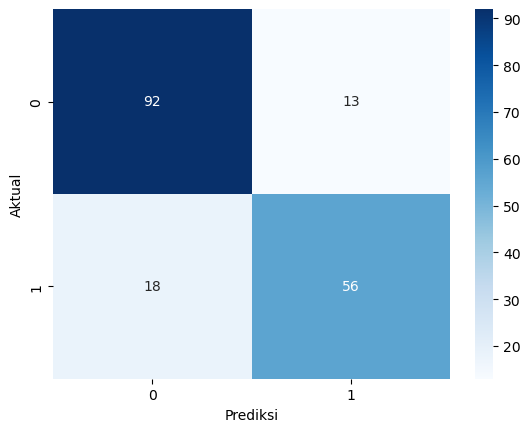


Classification Report Final:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [105]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Gunakan model terbaik hasil tuning
best_dt_model = grid_search.best_estimator_
y_pred_final = best_dt_model.predict(X_test_scaled)

# Tampilkan Hasil Akhir
print(f"Akurasi Akhir pada Test Set: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Roc_auc_score: {roc_auc_score(y_test, y_pred_final):.4f}")
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("\nClassification Report Final:\n", classification_report(y_test, y_pred_final))

## Model Comparison

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 1. Inisialisasi Model-Model Tambahan
logreg = LogisticRegression(max_iter=1000)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Training Model
logreg.fit(X_train_scaled, y_train)
gbc.fit(X_train_scaled, y_train)

# 3. Prediksi
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_gbc = gbc.predict(X_test_scaled)

# 4. Bandingkan Hasil Akurasi
print(f"Akurasi Random Forest (Tuned): {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Akurasi Logistic Regression: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Akurasi Gradient Boosting: {accuracy_score(y_test, y_pred_gbc):.4f}")
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_logreg):.4f}")

Akurasi Random Forest (Tuned): 0.8268
Akurasi Logistic Regression: 0.8380
Akurasi Gradient Boosting: 0.8436
Akurasi Decision Tree: 0.8380


## Summary

In [108]:
#summary model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List model yang akan dibandingkan
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

results = []

for name, model in models:
    # Training
    model.fit(X_train_scaled, y_train)
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Hitung Metrik
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

# Tampilkan dalam bentuk DataFrame
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
3    Gradient Boosting  0.843575   0.819444  0.797297  0.808219  0.907400
0  Logistic Regression  0.837989   0.800000  0.810811  0.805369  0.893694
1        Random Forest  0.832402   0.797297  0.797297  0.797297  0.908172
2         DecisionTree  0.782123   0.721519  0.770270  0.745098  0.787259


## Save Model

In [109]:
import pickle

# Menyimpan model terbaik (Gradient Boosting) ke dalam file
with open('best_titanic_model.pkl', 'wb') as file:
    pickle.dump(gbc, file) # gbc adalah variabel model Gradient Boosting kamu

print("Model berhasil disimpan!")

Model berhasil disimpan!


In [119]:
import pickle

# Pastikan nama variabelnya sesuai dengan nama scaler yang kamu buat tadi (misal: scaler)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("File scaler.pkl berhasil dibuat!")

File scaler.pkl berhasil dibuat!


## Saved Model Test Case

In [117]:
import pandas as pd

# Ambil nama kolom dari X yang asli agar urutannya persis sama
column_names = X.columns 

# Buat data penumpang baru sebagai DataFrame
test_passenger_df = pd.DataFrame([[3, 25, 0, 0, 1.0, 1, 0, 1, 0, 0, 1, 0, 0]], columns=column_names)
# Catatan: Pastikan jumlah angka di dalam list [] (14 kolom fitur)

# Scale dan Predict
test_passenger_scaled = scaler.transform(test_passenger_df)
prediction = gbc.predict(test_passenger_scaled)
probability = gbc.predict_proba(test_passenger_scaled)

print(f"Prediksi: {'Selamat' if prediction[0] == 1 else 'Tewas'}")
print(f"Peluang: {probability[0][1]*100:.2f}%")

Prediksi: Tewas
Peluang: 33.02%
